## Dataset

### Escolha do dataset para um aprendizado supervisionado foi o Air Quality and Pollution Assessment, disponivel no kaggle pelo link: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment

### No caso do dataset, vamos utilizar a coluna "Air Quality" como alvo para o modelo, levando em consideração as outras variaveis.

#### IMPORT DAS BIBLIOTECAS NECESSÁRIAS


In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')


In [14]:
df = pd.read_csv('data\pollution_dataset.csv')

In [15]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [17]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.464580,60.068140,29.905580,40.003700,21.00036,15.141060,0.904314,5.031880,299.948200
std,5.486219,15.044806,30.285899,30.693124,11.30099,7.668466,0.297840,5.010352,17.215133
min,3.500000,10.000000,0.000000,-1.400000,-13.50000,0.000000,-0.080000,0.000000,243.000000
25%,21.800000,49.900000,8.500000,18.900000,13.80000,9.900000,0.700000,1.500000,288.000000
50%,25.300000,60.200000,20.600000,31.100000,20.50000,15.100000,0.905000,3.500000,300.000000
75%,28.900000,70.100000,41.500000,51.500000,27.50000,20.400000,1.100000,6.900000,311.000000
max,46.200000,100.000000,249.000000,256.100000,96.40000,41.700000,2.140000,46.300000,358.000000


In [18]:
df_num = df.select_dtypes(include=[np.number])

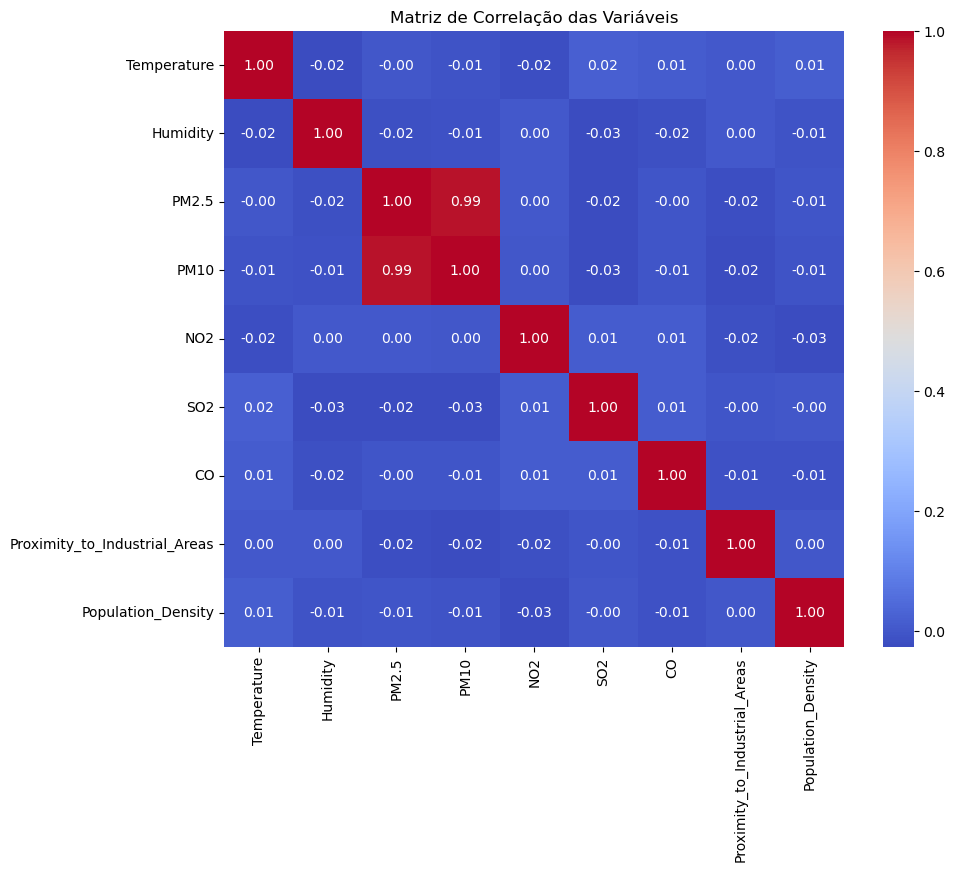

In [19]:
# Matriz de correlção
correlation_matrix = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis')
plt.show()

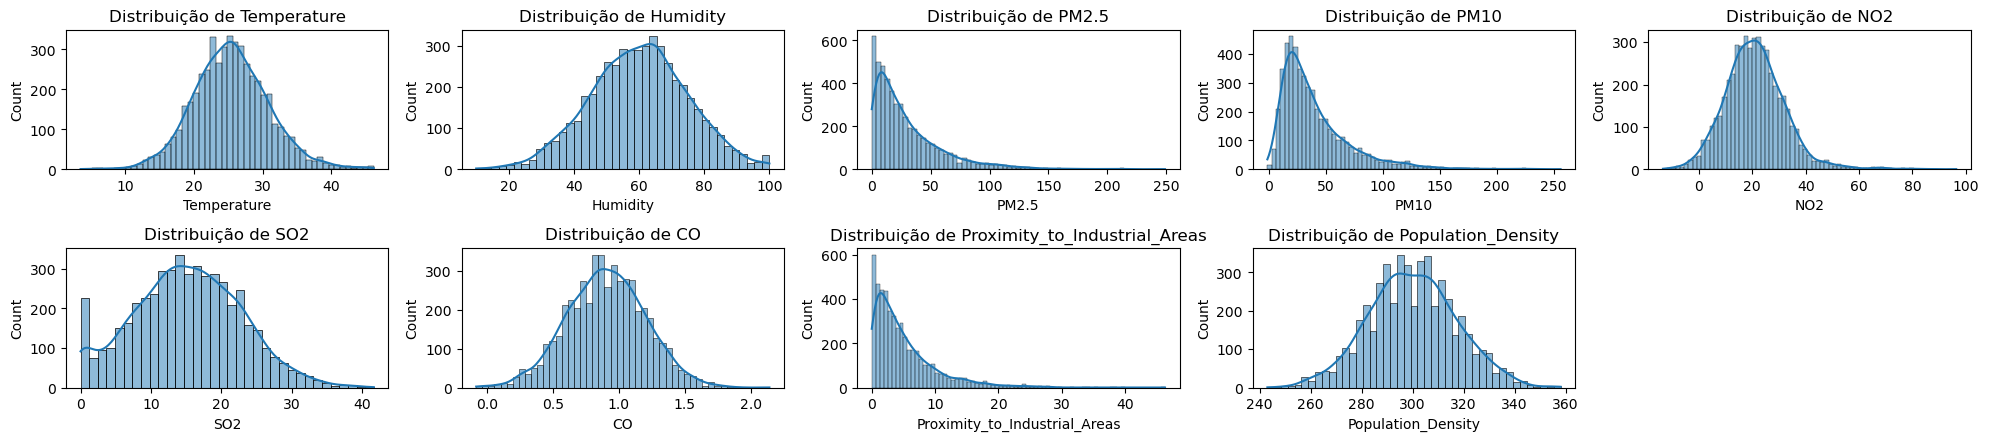

In [20]:
# Plot dos gráficos de distribuição 
num_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_columns, 1):
    plt.subplot(7, 5, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

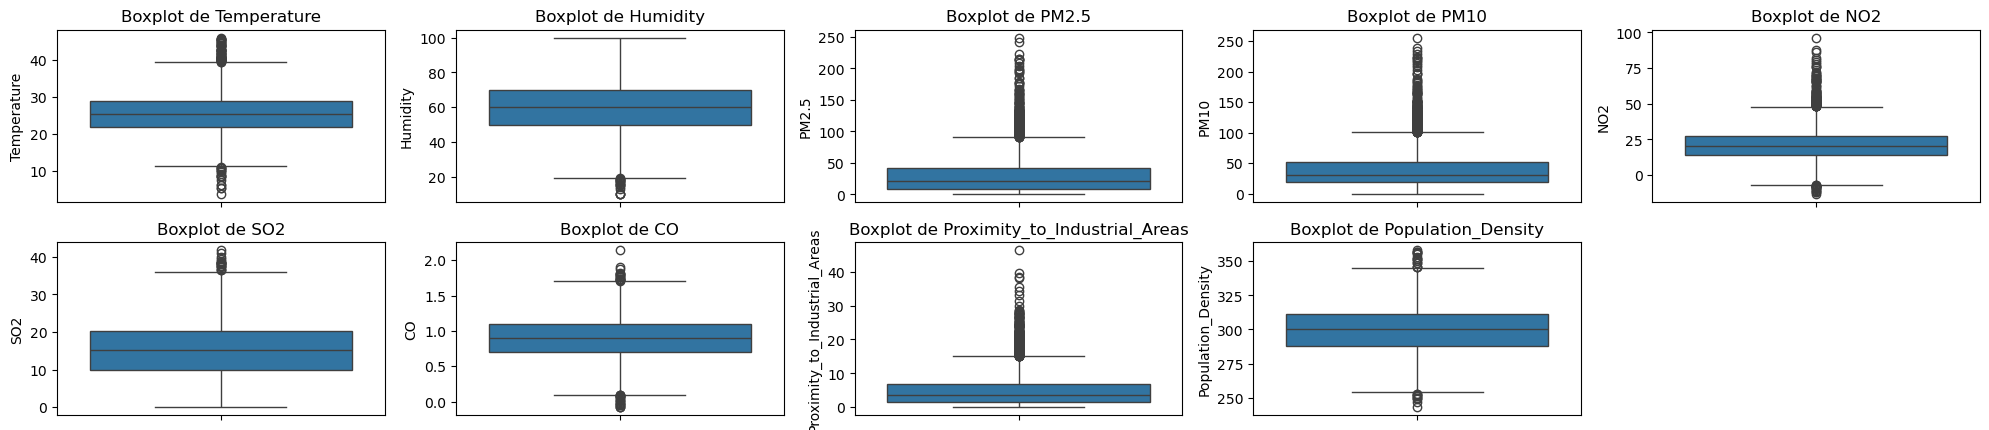

In [21]:
# Plotando os graficos de boxplot para ver a presença de outliers

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_columns, 1):
    plt.subplot(7, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [22]:
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df_num

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293
...,...,...,...,...,...,...,...,...,...
4995,29.3,36.8,80.3,90.9,9.2,14.1,0.97,10.2,287
4996,15.7,51.7,0.7,11.4,40.5,13.8,1.07,4.2,320
4997,27.8,48.1,8.9,16.4,8.6,17.7,0.54,0.3,302
4998,30.4,50.4,2.2,18.8,13.1,22.3,0.94,6.7,308


In [ ]:
# Agrupando as categorias para melhorar a análise e desempenho do modelo

df['Air Quality'] = df['Air Quality'].replace({'Good': 'Good/Moderate', 'Moderate': 'Good/Moderate', 'Poor': 'Poor/Hazardous', 'Hazardous': 'Poor/Hazardous'})
df['Air Quality'].value_counts() 

Air Quality
Good/Moderate     3500
Poor/Hazardous    1500
Name: count, dtype: int64

In [125]:
x = df_num
y = df['Air Quality']

## TREINAMENTO DOS MODELOS E RESULTADOS

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [119]:
# Modelos utilizados para classificação

lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Modelo de votação

modelo = VotingClassifier(
    estimators=[
        ('log_reg', lr),
        ('rf', rf)
    ],
    voting='soft'
)


In [128]:
modelo.fit(x_train, y_train)

y_pred_train = modelo.predict(x_train)
y_pred_test = modelo.predict(x_test)

TREINO
                precision    recall  f1-score   support

 Good/Moderate       0.93      1.00      0.96      2450
Poor/Hazardous       1.00      0.81      0.90      1050

      accuracy                           0.94      3500
     macro avg       0.96      0.91      0.93      3500
  weighted avg       0.95      0.94      0.94      3500



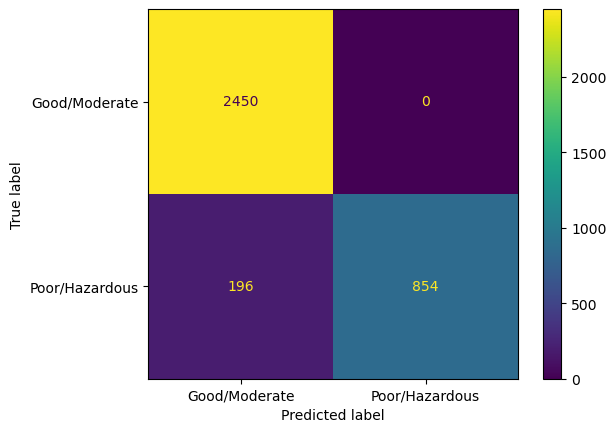



TESTE
                precision    recall  f1-score   support

 Good/Moderate       0.70      1.00      0.82      1050
Poor/Hazardous       0.00      0.00      0.00       450

      accuracy                           0.70      1500
     macro avg       0.35      0.50      0.41      1500
  weighted avg       0.49      0.70      0.58      1500



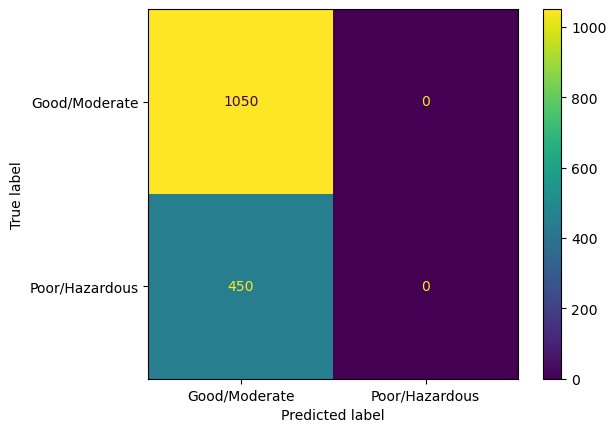

In [129]:
print("TREINO")
print(classification_report(y_train, y_pred_train))
print(ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train))
plt.show()

print("\n")
print("TESTE")
print(classification_report(y_test, y_pred_test))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test))

In [123]:
print("Distribuição no treino:")
print(y_train.value_counts())
print("\nDistribuição no teste:")
print(y_test.value_counts())


Distribuição no treino:
Air Quality
Good/Moderate     2450
Poor/Hazardous    1050
Name: count, dtype: int64

Distribuição no teste:
Air Quality
Good/Moderate     1050
Poor/Hazardous     450
Name: count, dtype: int64


## Considerações Finais

### Apesar do modelo ser muito bom no treino, com uma boa acurácia, creio que ele esta altamente enviesado pelo desbalanceamento de cada classe no dataset, para melhorar e conseguir ajustar o modelo para classificar lugares com piores níveis de qualidade de ar e poluição recomendo fortemente que seja feita um investimento maior na coleta de dados, pois nenhum modelo de classificação foi capaz, com os dados disponíveis, de chegar em métricas aceitáveis sem que ele erre praticamente todos os dados de quantidade inferior, como os dados de Poor/Hazadours.